В цьому домашньому завданні ми реалізуємо логістичну регресію на `numpy`.
Ці завдання допоможуть вам ґрунтовно засвоїти основні концепції логістичної регресії та реалізувати їх на практиці 🔥

#### Завдання 1: Реалізація функції сигмоїди
1. З використанням `numpy` напишіть функцію `sigmoid(z)` для обчислення значення сигмоїди згідно з формулою:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
2. Використовуючи цю функцію, обчисліть значення сигмоїди для наступних даних: $ z = [-2, -1, 0, 1, 2] $. Виведіть результат обчислень.


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def sigmoid(z):
  y = 1 / (1 + np.e ** (-z))
  return y

In [3]:
z = np.array([-2, -1, 0, 1, 2])

In [4]:
y = sigmoid(z)
y

array([0.11920292, 0.26894142, 0.5       , 0.73105858, 0.88079708])

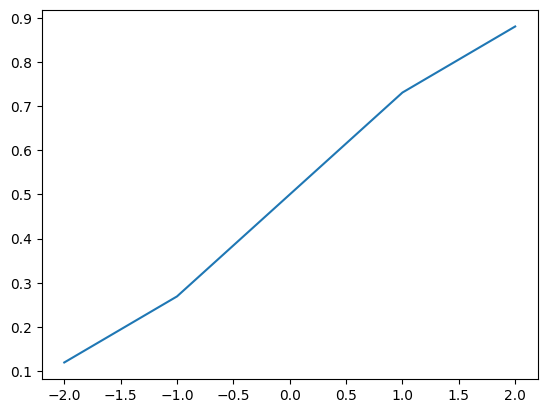

In [5]:
plt.plot(z, y);



#### Завдання 2: Реалізація функції гіпотези для логістичної регресії
1. Напишіть функцію `hypothesis(theta, X)`, яка обчислює гіпотезу для логістичної регресії, використовуючи функцію сигмоїди. Формула гіпотези:
   $$
   h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
   $$
2. Використайте функцію `hypothesis` для обчислення значень гіпотези для наступних даних:
   
   $\theta = [0.5, -0.5]$
   
   $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  Виведіть результат обчислень.


In [6]:
def hypothesis(theta, X):
  predicts = 1 / (1 + np.exp(-np.dot(X, theta.T)))
  return predicts

In [7]:
X = np.array([[1,2], [1, -1], [1, 0], [1, 1]])

In [8]:
coefs = np.array([[0.5, -0.5]])

In [9]:
predicts = hypothesis(coefs, X)
predicts

array([[0.37754067],
       [0.73105858],
       [0.62245933],
       [0.5       ]])

#### Завдання 3: Реалізація функції для підрахунку градієнтів фукнції втрат
1. Напишіть функцію `compute_gradient(theta, X, y)`, яка обчислює градієнти функції втрат для логістичної регресії. Формула для обчислення градієнта:
   $$
   \frac{\partial L(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \right]
   $$
2. Використайте функцію `compute_gradient` для обчислення градієнтів для наступних даних:

  $\theta = [0.5, -0.5]$

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Виведіть результат обчислень.

In [10]:
def compute_gradient(theta, X, y):
  predicts = hypothesis(theta, X)
  gradient = np.dot(X.T, (predicts - y)) / X.shape[0]
  return gradient

In [11]:
y = np.array([[1, 0, 1, 0]]).T
y

array([[1],
       [0],
       [1],
       [0]])

In [12]:
gradients = compute_gradient(coefs, X, y)
gradients

array([[ 0.05776464],
       [-0.36899431]])


#### Завдання 4: Реалізація повного батч градієнтного спуску

**Задача:**
1. Напишіть функцію `full_batch_gradient_descent(X, y, lr=0.1, epochs=100)`, яка реалізує алгоритм Full градієнтного спуску для логістичної регресії. Використовуйте такі формули:
   - Гіпотеза: $ h_\theta(x) = \sigma(\theta^T x) $
   - Оновлення параметрів: $ \theta_j := \theta_j - \alpha \frac{\partial L(\theta)}{\partial \theta_j} $
2. Використайте функцію `full_batch_gradient_descent` для обчислення параметрів моделі на наступних даних:

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Увага! Матриця $X$ вже має стовпець одиниць і передбачається, що це. - стовпець для intercept - параметра зсуву.

  Виведіть результат обчислень.


In [13]:
y.shape

(4, 1)

In [14]:
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
  theta = np.zeros((1, X.shape[1]))
  errors = []

  for _ in range(epochs):
    y_pred = hypothesis(theta, X)
    error = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    errors.append(error)
    gradients = compute_gradient(theta, X, y)
    theta -= lr * gradients.T
  return theta.flatten(), errors



In [15]:
theta, errors = full_batch_gradient_descent(X, y)

In [16]:
theta

array([-0.2893693 ,  0.77655125])

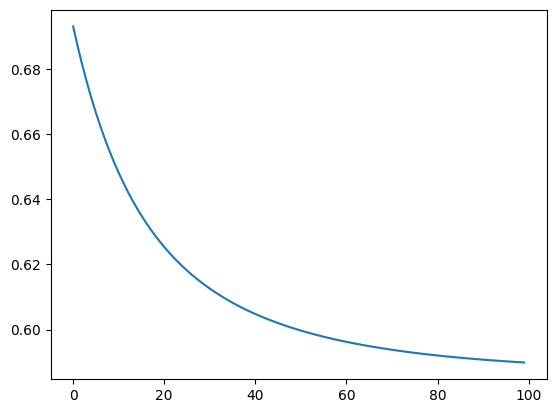

In [17]:
plt.plot(errors);

На графіку бачимо плавне зменшення розміру помилки з кожною наступною епохою

#### Завдання 5. Обчислення точності моделі

1. Напишіть функцію `predict_proba(theta, X)`, яка використовує знайдені параметри $\theta$ для обчислення ймовірностей належності поточного прикладу з даних до класу $y=1$ на основі значень $\sigma(\theta^T x)$.

2. Напишіть функцію `predict(theta, X, threshold=0.5)`, яка обчислює клас з передбаченої імовірності належності екземпляра до класу 1 з порогом 0.5. Тобто якщо ймовірність менше 0.5, то передбачаємо клас 0, інакше клас 1.

3. Напишіть функцію `accuracy(y_true, y_pred)`, яка обчислює точність моделі, визначивши частку правильно передбачених класів.

  Формула метрики Accuracy:
  $$
  \text{Accuracy} = \frac{\sum_{i=1}^{m} I(\hat{{y}^{(i)}} = y^{(i)})}{m}
  $$

  де $\hat{{y}^{(i)}}$ - передбачене значення класу, $I$ - індикаторна функція (яка дорівнює 1, якщо умова виконується, і 0 - якщо ні), $m$ - кількість прикладів.

4. Обчисліть з використанням даних в завданні 4 $X$, $y$ та обчислених коефіцієнтах $\theta$ та виведіть на екран:
  - передбачені моделлю імовірності належності кожного з екземплярів в матриці `X` до класу 1
  - класи кожного екземпляра з матриці `X`
  - точність моделі.

In [18]:
def predict_proba(theta, X):
  probability = 1 / (1 + np.exp(-np.dot(X, theta.T)))
  return probability

In [19]:
def predict(theta, X, threshold=0.5):
  predict_probability = predict_proba(theta, X)
  predict_class = (predict_probability > threshold).astype(int)
  return predict_class

In [20]:
def accuracy(y_true, y_pred):
  accuracy = (y_true.ravel() == y_pred).sum() / len(y_true)
  return accuracy

In [21]:
predicted_probability = predict_proba(theta, X)
predict_classes = predict(theta, X, threshold=0.5)
accuracy = accuracy(y, predict_classes)
print(f'Передбачені моделлю імовірності належності кожного з екземплярів в матриці X до класу 1:\n{predicted_probability}')
print(f'Класи кожного екземпляра з матриці X:\n{predict_classes}')
print(f'Точність моделі: {accuracy}')

Передбачені моделлю імовірності належності кожного з екземплярів в матриці X до класу 1:
[0.77966809 0.25617965 0.42815828 0.61944235]
Класи кожного екземпляра з матриці X:
[1 0 0 1]
Точність моделі: 0.5
